# **Lab 2 - Logistic Regression**


Q1. Class Imbalance:
   - Class 0 constitutes approximately 65.37% of the dataset, while class 1 constitutes about 34.63%. This indicates that there's a class imbalance issue, with class 0 being the majority class and class 1 being the minority class. Class imbalance can affect the performance of machine learning models, especially for classification tasks, where the minority class might be overlooked or misclassified more often.

Q2. Missing Values:
   - There are no missing values present in the dataset. This is a positive aspect as missing values can often lead to challenges in data analysis and model building. Having a complete dataset ensures that we can proceed with our analysis without imputation or deletion of incomplete records.

Q3. Categorical Feature 'Family History':
   - The feature 'family history' is categorical, with two categories: present and absent. This categorical feature can be effectively encoded using one-hot encoding, where two binary features (present and absent) are created to represent the original categorical feature. This allows us to incorporate this information into machine learning models that require numerical inputs.

Q4. Feature Correlation:
   - The features 'obesity' and 'adiposity' exhibit the highest correlation coefficient of 0.72. This high correlation suggests that there is a strong linear relationship between these two features. When two features are highly correlated, it might indicate redundancy in the information they provide, which can affect the performance of some machine learning algorithms, especially those sensitive to multicollinearity.

Q5. Gradient Descent with Regular Learning Rate (0.001):
   - With a learning rate of 0.001, an epoch of 10,000 is sufficient to observe a little decrease in the cost function. This indicates that the model is gradually converging towards the optimal solution. However, it's important to monitor the cost function over more epochs to ensure convergence and to avoid overfitting.
   - With a learning rate of 0.0001, the learning rate is too slow to observe significant progress even after 10,000 epochs. This suggests that the learning rate might be too small for effective learning, and increasing the learning rate or adjusting other hyperparameters might be necessary.

Q6. Gradient Descent with Mini-Batch:
   - For a learning rate of 0.001, an epoch of 2,000 is sufficient to observe little to no decrease in the cost function with mini-batch gradient descent. This indicates that mini-batch gradient descent is converging towards the optimal solution at a faster rate compared to regular gradient descent.
   - For a learning rate of 0.0001, after an epoch of 10,000, the cost function starts to decrease with mini-batch gradient descent. This suggests that even with a smaller learning rate, mini-batch gradient descent can eventually converge towards the optimal solution, albeit at a slower rate compared to a higher learning rate.


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the dataset from URL
heart_df = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")
features = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist_Absent', 'famhist_Present', 'typea', 'obesity', 'alcohol', 'age', 'chd']

# Refactoring the DataFrame
heart_df = heart_df.drop('row.names', axis=1)
heart_df = pd.get_dummies(heart_df, "famhist")
print("Final DataFrame columns:", heart_df.columns.tolist())



Final DataFrame columns: ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'chd', 'famhist_Absent', 'famhist_Present']


## Calculate the percentage of each class (0 and 1)

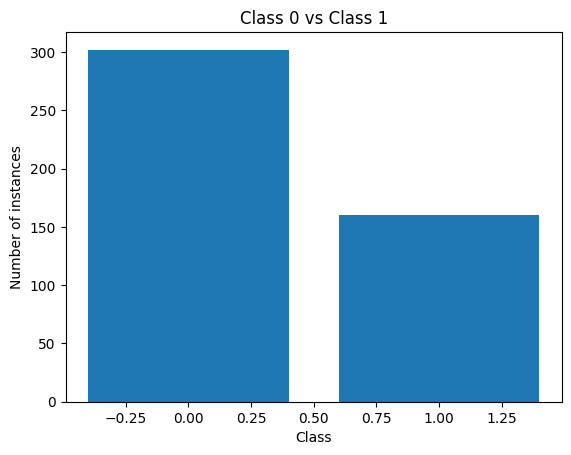

Class 0: 65.36796536796537% | Class 1: 34.63203463203463 
Number of missing features: 
sbp                0
tobacco            0
ldl                0
adiposity          0
typea              0
obesity            0
alcohol            0
age                0
chd                0
famhist_Absent     0
famhist_Present    0
dtype: int64


In [38]:

# Calculating the percentage of class 0 and 1
class_percentage = heart_df['chd'].value_counts()
plt.bar([0,1], class_percentage)
plt.title('Class 0 vs Class 1')
plt.xlabel("Class")
plt.ylabel("Number of instances")
plt.show()

Total_Percentage = class_percentage[0] + class_percentage[1]
print(f"Class 0: {str((class_percentage[0]/Total_Percentage)*100)}% | Class 1: {str((class_percentage[1]/Total_Percentage)*100)} ")

# Checking for the missing values
print(f"Number of missing features: \n{heart_df.isnull().sum()}")



## Categorical Feature 'Family History'

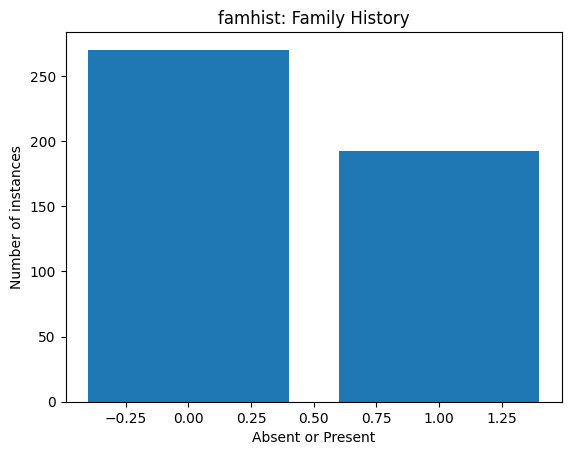

In [39]:
# Identify categorical variables of Family History
famhist_counts = heart_df['famhist_Present'].value_counts()
plt.bar([0,1], famhist_counts)
plt.title('famhist: Family History')
plt.xlabel("Absent or Present")
plt.ylabel("Number of instances")
plt.show()

## Correlation Matrix

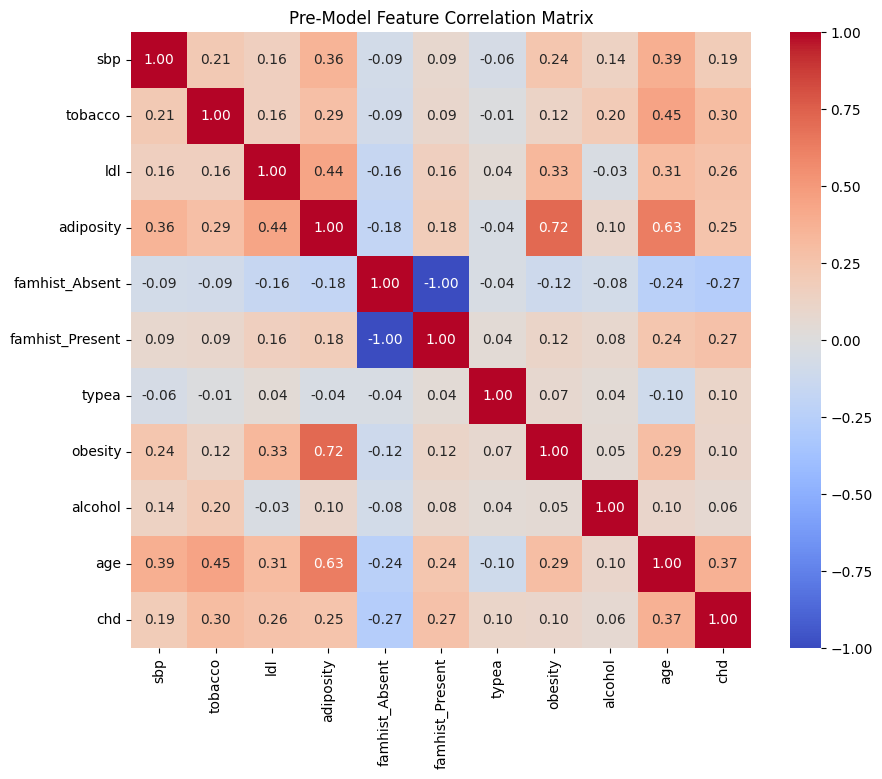

In [40]:
# Finding features with maximum correlation matrix
correlate_matrix = heart_df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlate_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pre-Model Feature Correlation Matrix')
plt.show()

## Gradient Descent with Regular Learning Rate (0.001)

sbp Standardized
tobacco Standardized
ldl Standardized
adiposity Standardized
typea Standardized
obesity Standardized
alcohol Standardized
age Standardized
famhist_Absent Standardized
famhist_Present Standardized
Random Weights: [0.33897019 0.35687686 0.79906467 0.64570297 0.10135045 0.28798786
 0.4045986  0.62519189 0.47717465 0.35822085]


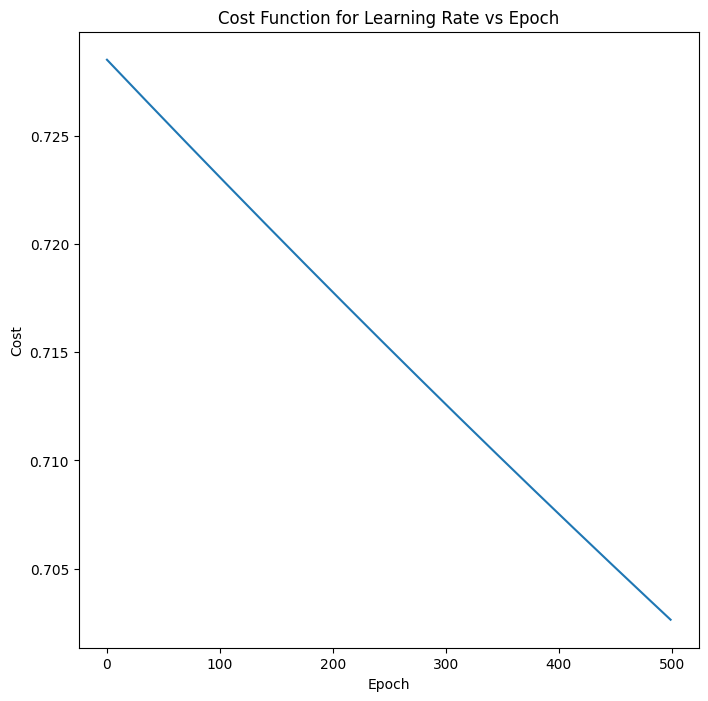

For epoch 500 + Learning Rate 0.001 :
Accuracy: 0.5948275862068966
Weights: [0.31360595 0.34774277 0.76623493 0.59059359 0.12296617 0.23718994
 0.38702696 0.60094053 0.45558409 0.37981142]
Random Weights: [0.79847825 0.08029811 0.4535554  0.84072172 0.17262911 0.15280325
 0.96710266 0.4204896  0.43106086 0.32819055]


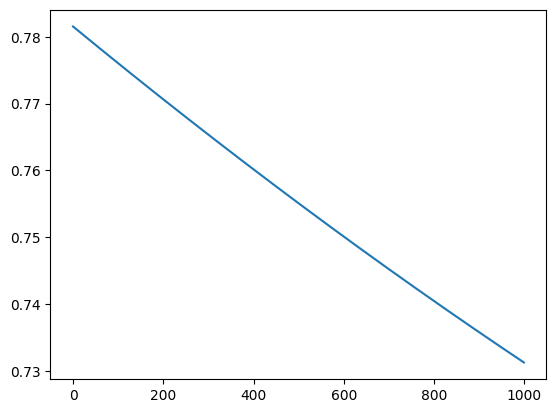

For epoch 1000 + Learning Rate 0.001 :
Accuracy: 0.6120689655172413
Weights: [0.72021816 0.08457382 0.42256456 0.74275362 0.20883205 0.05978624
 0.88838506 0.39013501 0.38686619 0.37238522]
Random Weights: [0.55596494 0.49745052 0.46685319 0.55093211 0.5330765  0.43403604
 0.38859622 0.46835063 0.21660269 0.30930468]


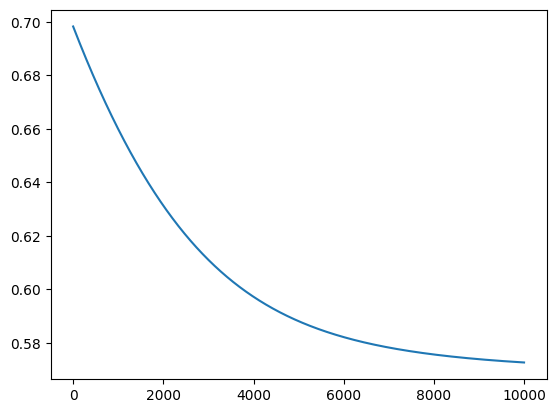

For epoch 10000 + Learning Rate 0.001 :
Accuracy: 0.646551724137931
Weights: [ 0.24470002  0.40187263  0.30601257  0.11639383  0.42394476 -0.07899214
  0.12276151  0.40476767  0.08866802  0.43723935]
Random Weights: [0.32999083 0.59169139 0.40875452 0.26805209 0.56883703 0.06276951
 0.73775421 0.0176081  0.8173793  0.60248662]


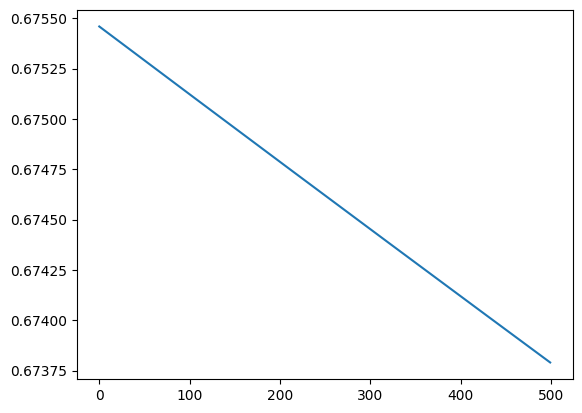

For epoch 500 + Learning Rate 0.0001 :
Accuracy: 0.6293103448275862
Weights: [0.3292626  0.59099216 0.40858492 0.26713425 0.56715826 0.06068949
 0.73396367 0.01991827 0.81326483 0.60660109]
Random Weights: [0.79106009 0.01568652 0.51018957 0.88978195 0.41622575 0.04422932
 0.85487015 0.9466823  0.54844294 0.345945  ]


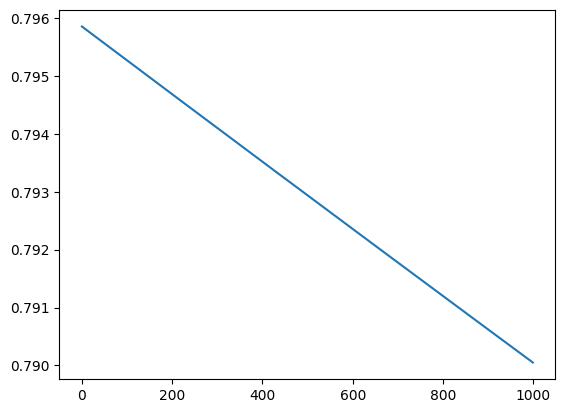

For epoch 1000 + Learning Rate 0.0001 :
Accuracy: 0.6120689655172413
Weights: [0.78272651 0.01549128 0.50604512 0.8786015  0.41886563 0.03483723
 0.84817267 0.94033511 0.5438109  0.35057704]
Random Weights: [0.02563713 0.60711005 0.72642376 0.35655072 0.80342125 0.09232819
 0.55682234 0.91831647 0.90740144 0.24228127]


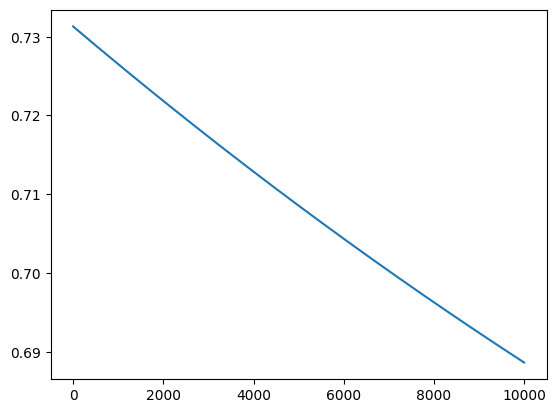

For epoch 10000 + Learning Rate 0.0001 :
Accuracy: 0.5862068965517241
Weights: [0.0155803  0.57794664 0.68466577 0.29472901 0.77327471 0.03353471
 0.5089885  0.89331155 0.81225976 0.33742296]


In [41]:
# Standardizing the feature columns
def standardize_feature(feature):
    return (heart_df[feature] - heart_df[feature].mean()) / heart_df[feature].std()

y = heart_df['chd'].values
heart_df = heart_df.drop('chd', axis=1)
for feature in heart_df.columns.values:
    heart_df[feature] = standardize_feature(feature)
    print(f"{feature} Standardized")

x = heart_df.values

# Dividing/splitting the dataset into both training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Sigmoid function for obtaining y_hat
def sigmoid_function(x, theta):
    z = np.dot(x, theta)
    return 1 / (1 + np.exp(-z))

# Function for predicting the classes
def predict_classes(x, theta, threshold=0.5):
    probability = sigmoid_function(x, theta)
    return (probability >= threshold).astype(int)  # return 0 or 1

# Logistic regression with batch parameter
def logistic_regression(x_train, y_train, batch_size, alpha=0.01, epochs=1000):
    print("="*100)
    m, n = x_train.shape
    theta = np.zeros(n)

    # Randomizing the weights
    for i in range(len(theta)):
        theta[i] = random.random()
    print(f"Random Weights: {theta}")

# For storing the cost values at each epoch
    cost_val = []
    for epoch in range(epochs):
        for i in range((m-1)//batch_size + 1):
            start_batch = i * batch_size
            end_batch = start_batch + batch_size
            x_batch = x_train[start_batch:end_batch]
            y_batch = y_train[start_batch:end_batch]

            y_hat = sigmoid_function(x_batch, theta)
            gradient = np.dot(x_batch.T, (y_hat - y_batch)) / batch_size
            theta -= alpha * gradient

        y_hat = sigmoid_function(x_train, theta)
        costTotal = -np.mean(y_train*(np.log(y_hat)) + (1-y_train)*np.log(1-y_hat))
        cost_val.append(costTotal)
    return theta, cost_val

# Array for alpha and epochs
learning_rates = [0.001, 0.0001]
epoch_set = [500, 1000, 10000]

# Plotting graphs of the cost function for different learning rates and epochs
plt.figure(figsize=(8, 8))
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function for Learning Rate vs Epoch')
for alpha in learning_rates:
    for epochs in epoch_set:
        theta, costTotal = logistic_regression(x_train, y_train, heart_df.shape[0], alpha, epochs)
        plt.plot(np.arange(epochs), costTotal, label=f"alpha={alpha}, Epochs={epochs}")
        plt.show()
        y_prediction = predict_classes(x_test, theta)
        accuracy = np.mean(y_prediction == y_test)
        print(f"For epoch {epochs} + Learning Rate {alpha} :\nAccuracy: {accuracy}\nWeights: {theta}")



## MINI BATCH




Random Weights: [0.47128456 0.98532047 0.14161307 0.76104675 0.23020681 0.90053201
 0.56531471 0.97602173 0.61920801 0.19883065]


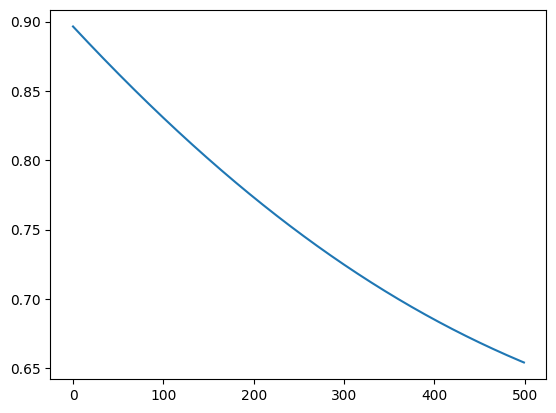

For epoch 500 + Learning Rate 0.001 :
Accuracy: 0.5775862068965517
Weights: [0.23211228 0.76240043 0.08154115 0.28204865 0.36197779 0.40824958
 0.32928432 0.71424896 0.39544757 0.42259108]
Random Weights: [0.27496169 0.4980988  0.59670831 0.13259524 0.9369014  0.95005062
 0.9437331  0.48185899 0.00268514 0.8104509 ]


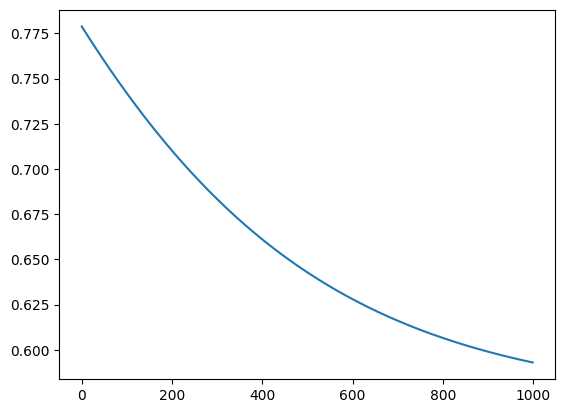

For epoch 1000 + Learning Rate 0.001 :
Accuracy: 0.5862068965517241
Weights: [ 0.16563068  0.4017762   0.40266476 -0.23263314  0.56945226  0.26732887
  0.40333039  0.53997134  0.19361246  0.61952358]
Random Weights: [0.94066769 0.83987119 0.58833602 0.9497401  0.60135247 0.20666844
 0.7498899  0.71055882 0.23210561 0.23074373]


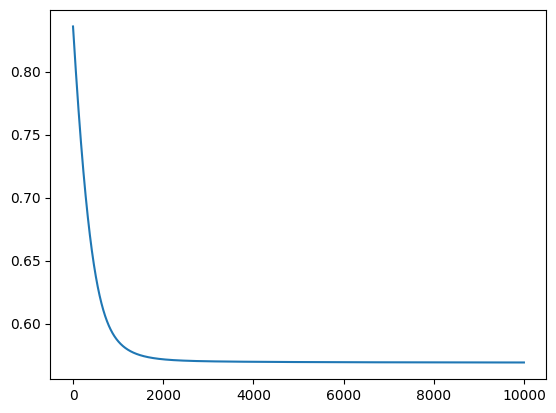

For epoch 10000 + Learning Rate 0.001 :
Accuracy: 0.6724137931034483
Weights: [ 0.14024834  0.38499641  0.34312096  0.09018484  0.35603297 -0.18189364
  0.05841517  0.50682433  0.04519673  0.4176526 ]
Random Weights: [0.30328063 0.72337805 0.03372431 0.81389232 0.16017072 0.96751611
 0.92852556 0.77837831 0.49368168 0.38722363]


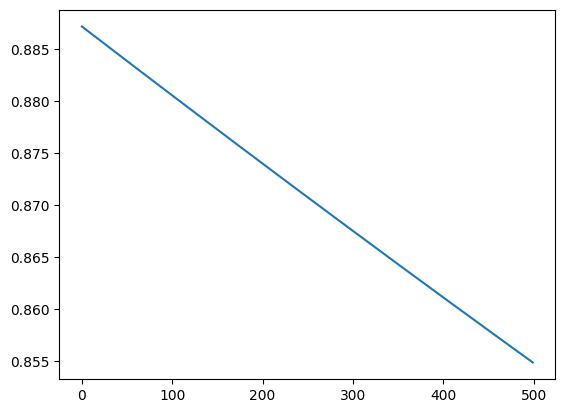

For epoch 500 + Learning Rate 0.0001 :
Accuracy: 0.5862068965517241
Weights: [0.2803642  0.7049575  0.02760191 0.75598736 0.17888841 0.90460721
 0.89115872 0.75526338 0.47491744 0.40598787]
Random Weights: [0.19115223 0.45129537 0.13686775 0.74680887 0.6530551  0.15567219
 0.32685006 0.82138565 0.45086731 0.07048324]


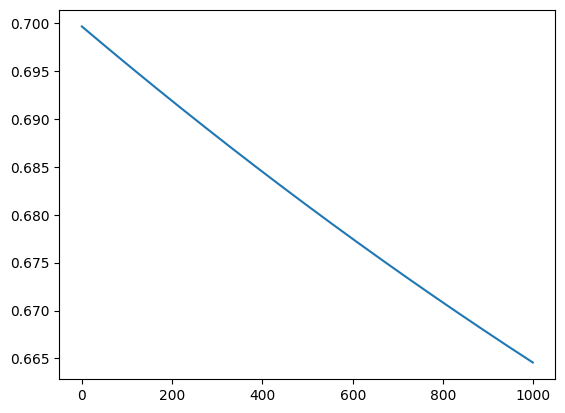

For epoch 1000 + Learning Rate 0.0001 :
Accuracy: 0.5862068965517241
Weights: [0.1649939  0.43217335 0.13003689 0.66820393 0.64339655 0.08341735
 0.29643259 0.78383994 0.38256214 0.13878842]
Random Weights: [0.65863173 0.38888504 0.35361154 0.27644119 0.13705863 0.65614372
 0.97513473 0.89976124 0.20855664 0.02404984]


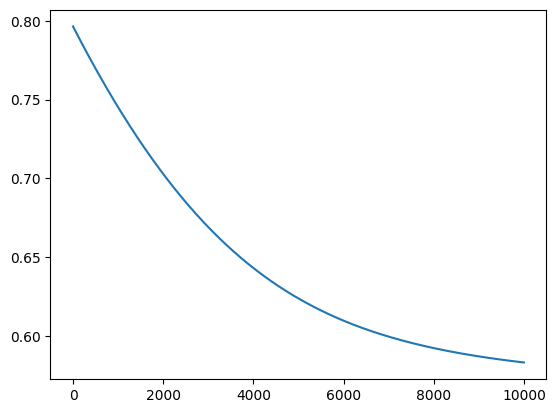

For epoch 10000 + Learning Rate 0.0001 :
Accuracy: 0.6293103448275862
Weights: [ 0.23856275  0.27854152  0.30376355 -0.17204056  0.32700983  0.11863062
  0.39065343  0.64510607 -0.02872513  0.26133161]


In [42]:

# Mini-batch
for alpha in learning_rates:
    for epochs in epoch_set:
        theta, costTotal = logistic_regression(x_train, y_train, 50, alpha, epochs)
        plt.plot(np.arange(epochs), costTotal, label=f"alpha={alpha}, Epochs={epochs}")
        plt.show()
        y_prediction = predict_classes(x_test, theta)
        accuracy = np.mean(y_prediction == y_test)
        print(f"For epoch {epochs} + Learning Rate {alpha} :\nAccuracy: {accuracy}\nWeights: {theta}")


## Compare with sklearn

In [43]:
# Compare with sklearn
sklearn_log_regression = LogisticRegression()
sklearn_log_regression.fit(heart_df, y)
print(f"\nSklearn Logistic Regression Feature Weights: \n{sklearn_log_regression.coef_}")
print(f"Our Model's Feature Weights: \n{theta}")


Sklearn Logistic Regression Feature Weights: 
[[ 0.13348486  0.36263811  0.35518894  0.14315372  0.3798715  -0.25657427
   0.00305966  0.64717687 -0.22699039  0.22699039]]
Our Model's Feature Weights: 
[ 0.23856275  0.27854152  0.30376355 -0.17204056  0.32700983  0.11863062
  0.39065343  0.64510607 -0.02872513  0.26133161]
